## **Step 5: Performance Evaluation**  

- Load Test Data

    - Load the original dataset
    - Apply the same preprocessing pipeline used in training.ipynb
    - Extract the 20% test set (the same as used during training)
    - Load Trained Models & Pipeline

- Load the saved classification model
- Load the saved regression model
- Load the preprocessing pipeline

**Evaluate Classification Model**

- Generate predictions on the test set. Compute:
    - Accuracy
    - Precision, Recall, F1-score
    - Confusion Matrix
    - ROC-AUC Curve

**Evaluate Regression Model**

- Generate predictions on the test set. Compute:
    - R² (Coefficient of Determination)
    - MAE (Mean Absolute Error)
    - MSE (Mean Squared Error)
    - RMSE (Root Mean Squared Error)

**``Task 6. After completing all steps above, provide the following:``**

- Compare models and justify which one is better for each task.
- At least one visualizations per classification tasks (e.g., confusion matrix, ROC curve, precision-recall curves).  

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utility import DataCleaner

df = pd.read_csv('Spotify_Song_Attributes.csv')



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

In [3]:
data_cleaning_pipeline=joblib.load('cleaning_pipeline.pkl')


In [4]:
df = data_cleaning_pipeline.transform(df)

/Users/chaotzuchieh/Documents/GitHub/project-1-TzuChieh_Chao/venv/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 1 to 5039
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         4261 non-null   object 
 1   artistName        4261 non-null   object 
 2   msPlayed          4261 non-null   int64  
 3   genre             4261 non-null   object 
 4   danceability      4261 non-null   float64
 5   energy            4261 non-null   float64
 6   key               4261 non-null   float64
 7   loudness          4261 non-null   float64
 8   mode              4261 non-null   float64
 9   speechiness       4261 non-null   float64
 10  acousticness      4261 non-null   float64
 11  instrumentalness  4261 non-null   float64
 12  liveness          4261 non-null   float64
 13  valence           4261 non-null   float64
 14  tempo             4261 non-null   float64
 15  type              4261 non-null   object 
 16  id                4261 non-null   object 
 17  

In [6]:
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0


In [7]:
classification_preprocessing_pipeline= joblib.load('cls_preprocessor.pkl')
regression_preprocessing_pipeline= joblib.load('reg_preprocessor.pkl')

In [8]:
logreg_model = joblib.load('best_logreg_model_danceability.pkl')
rf_classifer = joblib.load('best_rf_model_danceability.pkl')


linear_regression_model = joblib.load('linear_regression_model.pkl')
ridge_linear_model = joblib.load('ridge_model.pkl')
lasso_linear_model = joblib.load('lasso_model.pkl')
GridSearch_decision_tree = joblib.load('best_GridSearch_decision_tree_model.pkl')
RandomizedSearch_decision_tree = joblib.load('best_RandomizedSearch_decision_tree_model.pkl')

# Classification

In [9]:
cls_x_test = pd.read_csv('df_cls_x_test.csv')
cls_y_test = pd.read_csv('df_cls_y_test.csv')

## Logistic regression

Logistic Regression
Accuracy: 0.7456037514654161
Precision: 0.5447154471544715
Recall: 0.29385964912280704
F1 Score: 0.3817663817663818
Confusion Matrix: [[569  56]
 [161  67]]


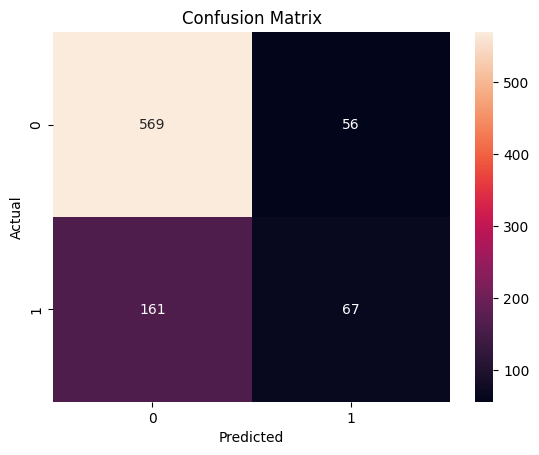

In [10]:
y1_pred_log_reg = logreg_model.predict(cls_x_test)
y1_pred_log_reg_proba = logreg_model.predict_proba(cls_x_test)


print('Logistic Regression')
print('Accuracy:', accuracy_score(cls_y_test, y1_pred_log_reg))
print('Precision:', precision_recall_fscore_support(cls_y_test, y1_pred_log_reg, average='binary')[0])
print('Recall:', precision_recall_fscore_support(cls_y_test, y1_pred_log_reg, average='binary')[1])
print('F1 Score:', precision_recall_fscore_support(cls_y_test, y1_pred_log_reg, average='binary')[2])
print('Confusion Matrix:', confusion_matrix(cls_y_test, y1_pred_log_reg))


cm = confusion_matrix(cls_y_test, y1_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier

Random Forest
Accuracy: 0.7549824150058617
Precision: 0.5714285714285714
Recall: 0.3333333333333333
F1 Score: 0.42105263157894735
Confusion Matrix: [[568  57]
 [152  76]]


Text(0.5, 1.0, 'confusion matrix')

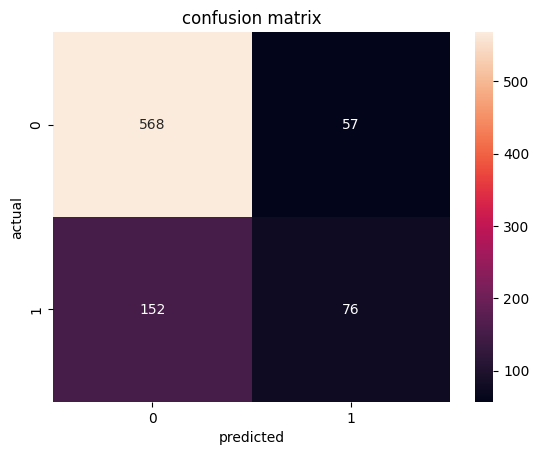

In [11]:
y1_pred_rand_for=rf_classifer.predict(cls_x_test)
y1_pred_rand_for_proba=rf_classifer.predict_proba(cls_x_test)[:,1]

print('Random Forest')
print('Accuracy:',accuracy_score(cls_y_test,y1_pred_rand_for))
print('Precision:',precision_recall_fscore_support(cls_y_test,y1_pred_rand_for,average='binary')[0])
print('Recall:',precision_recall_fscore_support(cls_y_test,y1_pred_rand_for,average='binary')[1])
print('F1 Score:',precision_recall_fscore_support(cls_y_test,y1_pred_rand_for,average='binary')[2])
print('Confusion Matrix:',confusion_matrix(cls_y_test,y1_pred_rand_for))
cm=confusion_matrix(cls_y_test,y1_pred_rand_for)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')

-----------

# Regression

In [12]:
reg_x_test = pd.read_csv('df_reg_x_test.csv')
reg_y_test = pd.read_csv('df_reg_y_test.csv')

## Linear Regression

In [13]:
y2_pred_lig_reg=linear_regression_model.predict(reg_x_test)
print('Linear Regression')
print('R2 Score:',r2_score(reg_y_test,y2_pred_lig_reg))
print('Mean Absolute Error:',mean_absolute_error(reg_y_test,y2_pred_lig_reg))
print('Mean Squared Error:',mean_squared_error(reg_y_test,y2_pred_lig_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(reg_y_test,y2_pred_lig_reg)))

Linear Regression
R2 Score: 0.3602056987416682
Mean Absolute Error: 0.15229598307314432
Mean Squared Error: 0.03626068026938245
Root Mean Squared Error: 0.190422373342479


## Linear Regression(Ridge)

In [14]:
y2_pred_lig_reg=ridge_linear_model.predict(reg_x_test)
print('Linear Regression(Ridge)')
print('R2 Score:',r2_score(reg_y_test,y2_pred_lig_reg))
print('Mean Absolute Error:',mean_absolute_error(reg_y_test,y2_pred_lig_reg))
print('Mean Squared Error:',mean_squared_error(reg_y_test,y2_pred_lig_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(reg_y_test,y2_pred_lig_reg)))

Linear Regression(Ridge)
R2 Score: 0.35670687196360706
Mean Absolute Error: 0.15419020882149784
Mean Squared Error: 0.03645897812678397
Root Mean Squared Error: 0.19094234241462518


## Linear Regression(Lasso)


In [15]:
y2_pred_lig_reg=lasso_linear_model.predict(reg_x_test)
print('Linear Regression(Lasso)')
print('R2 Score:',r2_score(reg_y_test,y2_pred_lig_reg))
print('Mean Absolute Error:',mean_absolute_error(reg_y_test,y2_pred_lig_reg))
print('Mean Squared Error:',mean_squared_error(reg_y_test,y2_pred_lig_reg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(reg_y_test,y2_pred_lig_reg)))

Linear Regression(Lasso)
R2 Score: 0.35649835874578195
Mean Absolute Error: 0.15423930116020515
Mean Squared Error: 0.03647079572364069
Root Mean Squared Error: 0.19097328536641112


## DecisionTreeRegressor(GridSearchCV)

In [16]:
y2_pred_decision_tree=GridSearch_decision_tree.predict(reg_x_test)
print('Decision Tree')
print('R2 Score:',r2_score(reg_y_test,y2_pred_decision_tree))
print('Mean Absolute Error:',mean_absolute_error(reg_y_test,y2_pred_decision_tree))
print('Mean Squared Error:',mean_squared_error(reg_y_test,y2_pred_decision_tree))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(reg_y_test,y2_pred_decision_tree)))

Decision Tree
R2 Score: 0.2950428441908042
Mean Absolute Error: 0.16042207583291546
Mean Squared Error: 0.03995381950126051
Root Mean Squared Error: 0.19988451541142577


## DecisionTreeRegressor(RandomizedSearchCV)

In [17]:
y2_pred_decision_tree=RandomizedSearch_decision_tree.predict(reg_x_test)
print('Decision Tree')
print('R2 Score:',r2_score(reg_y_test,y2_pred_decision_tree))
print('Mean Absolute Error:',mean_absolute_error(reg_y_test,y2_pred_decision_tree))
print('Mean Squared Error:',mean_squared_error(reg_y_test,y2_pred_decision_tree))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(reg_y_test,y2_pred_decision_tree)))

Decision Tree
R2 Score: 0.2509975738287197
Mean Absolute Error: 0.16550395583307478
Mean Squared Error: 0.04245010848482428
Root Mean Squared Error: 0.20603424104945342


# Analysis of Models

## Classification

**The results indicated that the Random Forest classifier outperformed the Logistic Regression model.** 

## Regression

 **I implemented several machine learning regression models aimed at predicting valence to determine which model exhibited superior performance. However, it is noteworthy that none of the models yielded satisfactory results, with linear regression emerging as the most effective option.**